In [130]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [131]:
#loading the dataset
ufc=pd.read_csv('C:/Users/Administrator/Desktop/ufc/data.csv')
ufc.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [132]:
# shape of the dataset
ufc.shape

(5144, 145)

In [133]:
#null values
ufc.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                           23
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_BODY_att                  1265
B_avg_BODY_landed               1265
B_avg_CLINCH_att                1265
B_avg_CLINCH_landed             1265
B_avg_DISTANCE_att              1265
B_avg_DISTANCE_landed           1265
B_avg_GROUND_att                1265
B_avg_GROUND_landed             1265
B_avg_HEAD_att                  1265
B_avg_HEAD_landed               1265
B_avg_KD                        1265
B_avg_LEG_att                   1265
B_avg_LEG_landed                1265
B_avg_PASS                      1265
B_avg_REV                       1265
B

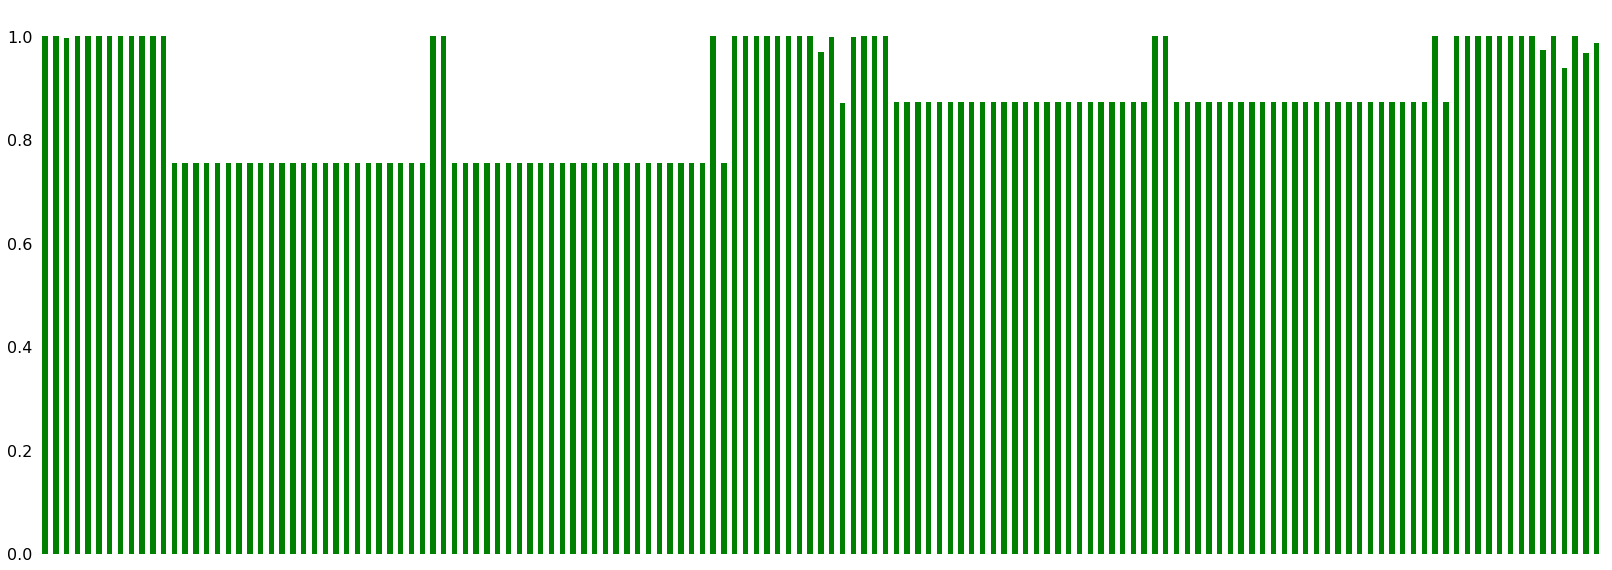

In [134]:
#To reduce the amount of data lets drop the coulmns which have very less data

msno.bar(ufc.sample(5144),(28,10),color='green')
#Too less data in Loaned from so lets drop it


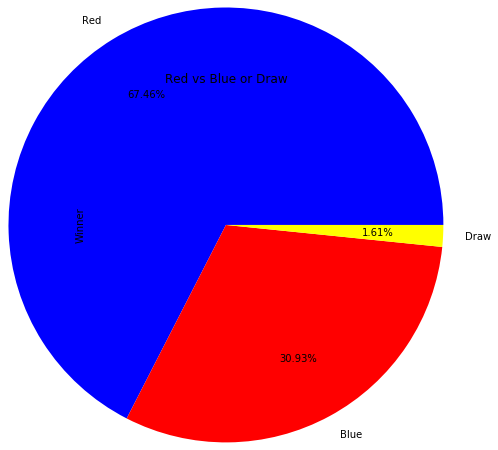

In [185]:
## Most number of winners
ufc['Winner'].value_counts().plot(kind='pie',autopct='%.2f%%',pctdistance=0.7,colors=['blue','red','yellow'],radius=2)
plt.title('Red vs Blue or Draw')
plt.show()

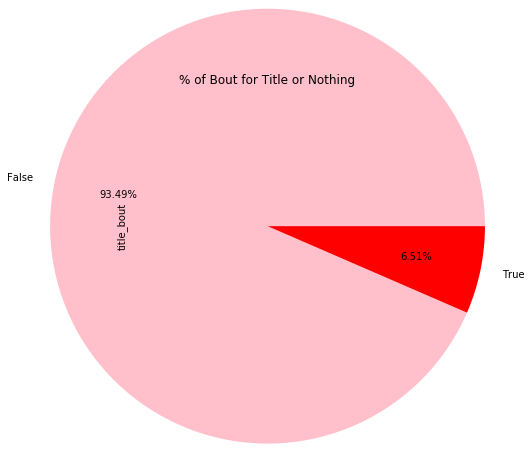

In [184]:
## total bout for title or for nothing
ufc['title_bout'].value_counts().plot(kind='pie',autopct='%.2f%%',pctdistance=0.7,colors=['pink','red'],radius=2)
plt.title('% of Bout for Title or Nothing')
plt.show()

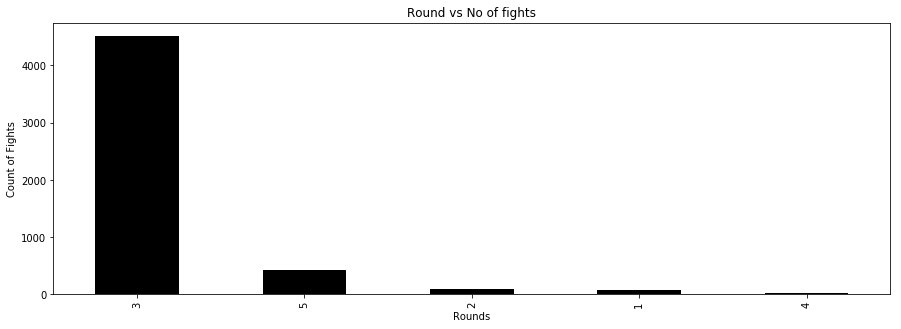

In [183]:
# number of rounds happened in a fight 
ufc['no_of_rounds'].value_counts().plot(kind='bar',color='black')
plt.xlabel('Rounds')
plt.ylabel('Count of Fights')
plt.title('Round vs No of fights')
plt.show()

In [138]:
# player with most number of losing streak
ufc['B_current_lose_streak'].value_counts()
ufc[ufc['B_current_lose_streak']==5][['R_fighter','B_fighter','Winner']]



,R_fighter,B_fighter,Winner
612,CB Dollaway,Hector Lombard,Red
782,Junior Albini,Andrei Arlovski,Blue
1783,Patrick Cote,Joshua Burkman,Red
2348,Gleison Tibau,Pat Healy,Red
4432,Michael Bisping,Elvis Sinosic,Red


In [139]:
## Hector LomBard is the person with most number of losing streak
ufc[ufc['B_current_lose_streak']==6][['R_fighter','B_fighter','Winner']]

,R_fighter,B_fighter,Winner
370,Thales Leites,Hector Lombard,Red


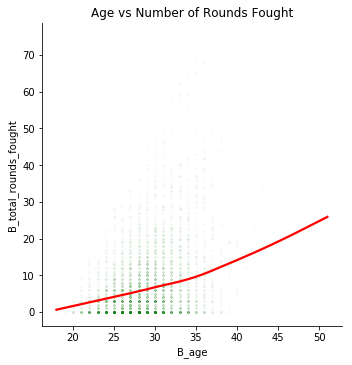

In [182]:
sns.lmplot(data = ufc, x = 'B_age', y = 'B_total_rounds_fought',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})
plt.title('Age vs Number of Rounds Fought')
plt.show()
## As age increases the no of rounds in a match for person in blue increases

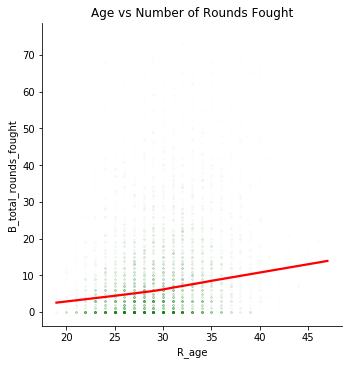

In [181]:
sns.lmplot(data = ufc, x = 'R_age', y = 'B_total_rounds_fought',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})
plt.title('Age vs Number of Rounds Fought')
plt.show()
## As age increases the no of rounds in a match for person in Red increases but not as in case of Blue

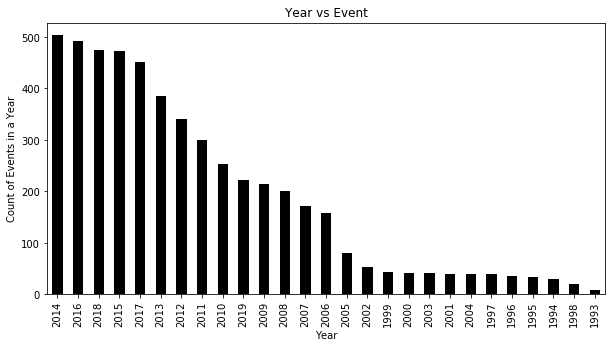

In [180]:
## no of ufc events in a year
plt.figure(figsize=(10,5))
xy=pd.to_datetime(ufc['date']).dt.year
xy.value_counts().sort_values(ascending=False).plot(kind='bar',color='black')
plt.xlabel('Year')
plt.ylabel('Count of Events in a Year')
plt.title('Year vs Event')
plt.show()

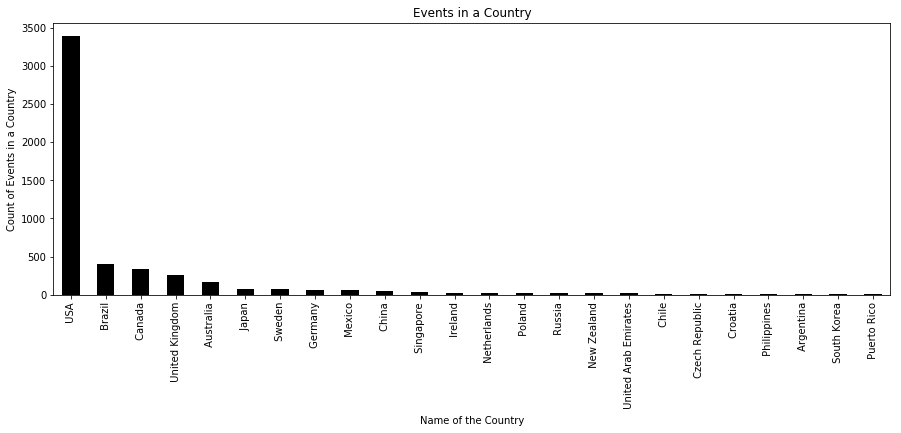

In [179]:
# events in a country
lst=[]
for i in ufc['location'].str.split(','):
    lst.append(i[-1])
ufc['Country']=lst
ufc['Country'].value_counts().sort_values(ascending=False).plot(kind='bar',color='black')
plt.xlabel('Name of the Country')
plt.ylabel('Count of Events in a Country')
plt.title('Events in a Country')
plt.show()

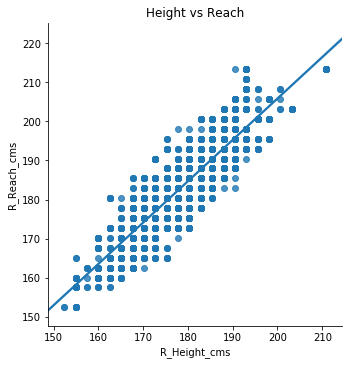

In [178]:
## Reach with Height for R
sns.lmplot(x='R_Height_cms', y='R_Reach_cms', data=ufc)

plt.title('Height vs Reach')
plt.show()

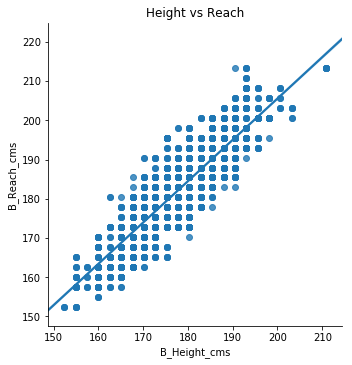

In [177]:
## Reach with Height for B
sns.lmplot(x='B_Height_cms', y='B_Reach_cms', data=ufc)
plt.title('Height vs Reach')
plt.show()

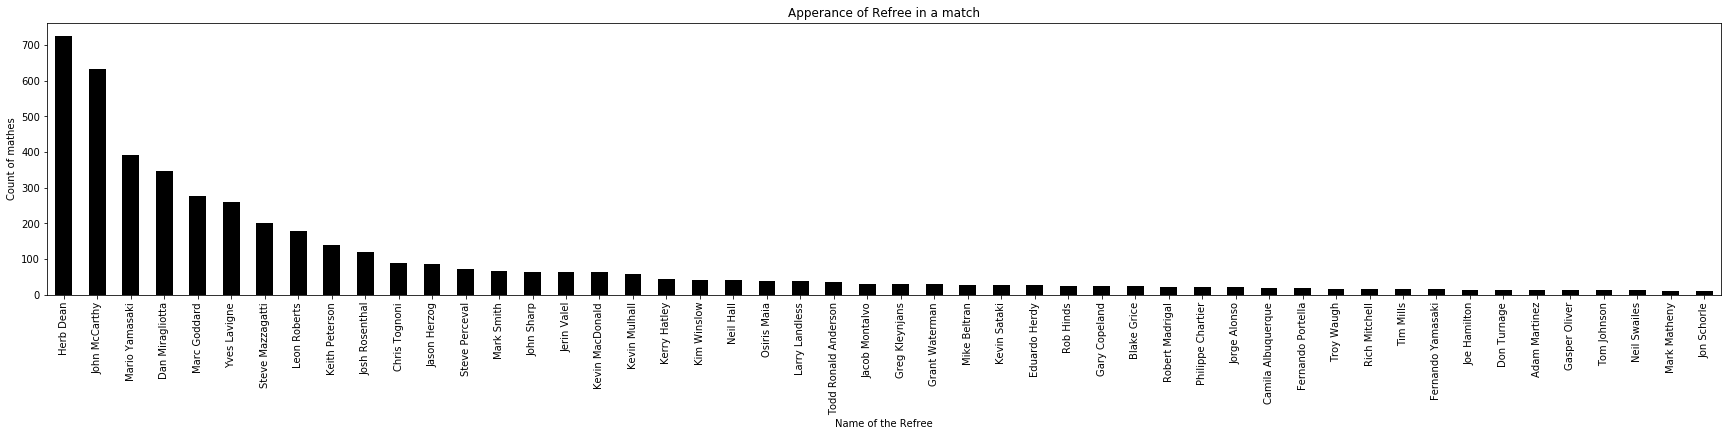

In [176]:
# count of Refree apperance in a match
plt.figure(figsize=(30,5))
ufc['Referee'].value_counts().sort_values(ascending=False).head(50).plot(kind='bar',color='black')
plt.xlabel('Name of the Refree')
plt.ylabel('Count of mathes')
plt.title('Apperance of Refree in a match')
plt.show()

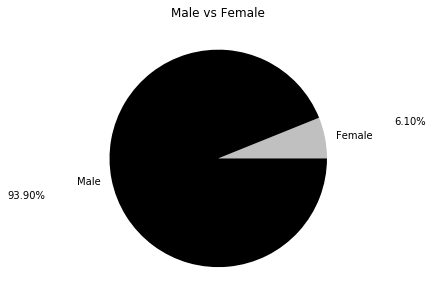

In [175]:
x=ufc['weight_class'].value_counts().loc[["Women's Strawweight","Women's Bantamweight","Women's Featherweight","Women's Flyweight"]]
y=ufc['weight_class'].value_counts().drop(["Women's Strawweight","Women's Bantamweight","Women's Featherweight","Women's Flyweight"])
qw=pd.DataFrame([x.sum(),y.sum()],index=['Female','Male'])
qw.columns=['Count']
qw.reset_index(inplace=True)
plt.pie(qw['Count'],labels=qw['index'],colors=['silver','black'],autopct='%.2f%%',pctdistance=1.8)
plt.title('Male vs Female')
plt.show()

<Figure size 1440x720 with 0 Axes>

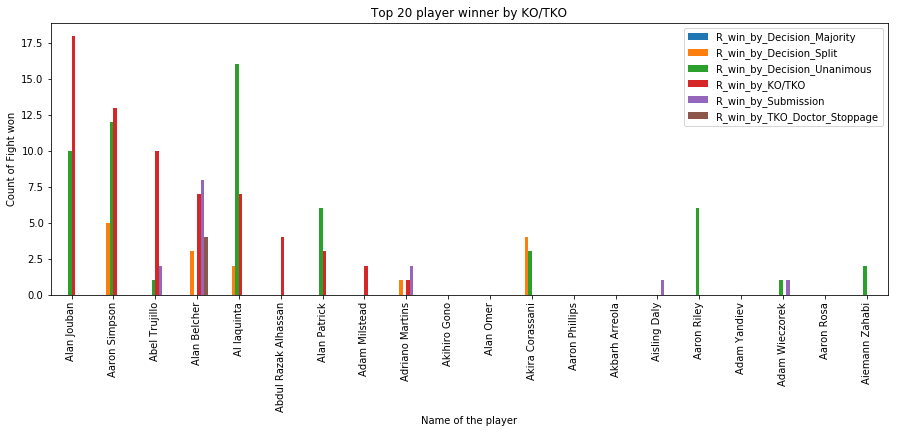

In [174]:
## Top 20 player win by KO/TKO
plt.figure(figsize=(20,10))
player_win_by=(ufc.groupby('R_fighter')[['R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_KO/TKO','R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage']].sum())
player_win_by.head(20).sort_values(by='R_win_by_KO/TKO',ascending=False).plot(kind='bar')
plt.xlabel('Name of the player')
plt.ylabel('Count of Fight won')
plt.title('Top 20 player winner by KO/TKO')
plt.show()

<Figure size 1440x720 with 0 Axes>

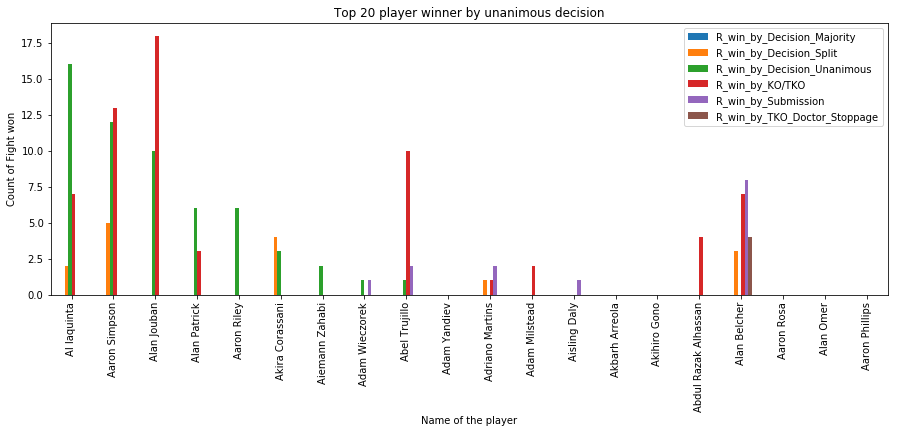

In [173]:
## Top 20 player win by R_win_by_Decision_Unanimous
plt.figure(figsize=(20,10))
player_win_by=(ufc.groupby('R_fighter')[['R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_KO/TKO','R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage']].sum())
player_win_by.head(20).sort_values(by='R_win_by_Decision_Unanimous',ascending=False).plot(kind='bar')
plt.xlabel('Name of the player')
plt.ylabel('Count of Fight won')
plt.title('Top 20 player winner by unanimous decision')
plt.show()

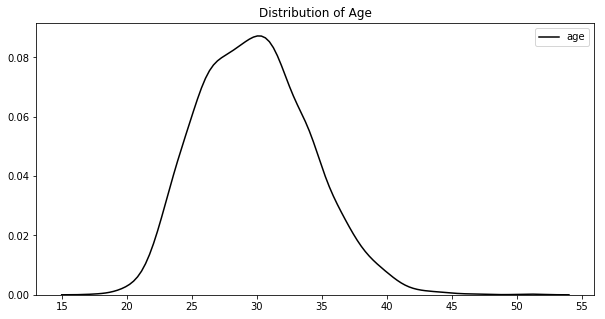

In [172]:
## Distribution of age of fighters
plt.figure(figsize=(10,5))
r_fighter=ufc[['R_fighter','R_age']]
r_fighter=r_fighter.rename(columns={'R_fighter':'Fighter','R_age':'age'})
b_fighter=ufc[['B_fighter','B_age']]
b_fighter=b_fighter.rename(columns={'B_fighter':'Fighter','B_age':'age'})
master_fighter=r_fighter.append(b_fighter,sort=False,ignore_index=True)
master_fighter.drop_duplicates(subset='Fighter', keep='first', inplace=True)
sns.kdeplot(master_fighter['age'],color='black')
plt.title('Distribution of Age')
plt.show()

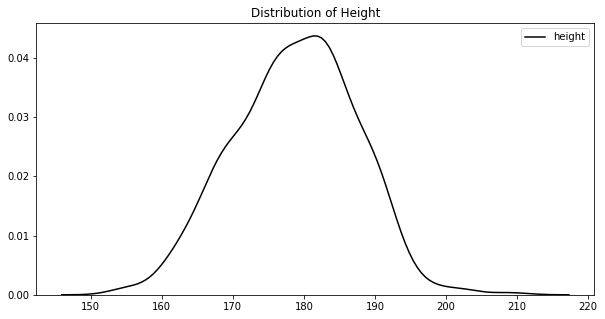

In [171]:
# Distribution of height of player
plt.figure(figsize=(10,5))
r_fighter=ufc[['R_fighter','R_Height_cms']]
r_fighter=r_fighter.rename(columns={'R_fighter':'Fighter','R_Height_cms':'height'})
b_fighter=ufc[['B_fighter','B_Height_cms']]
b_fighter=b_fighter.rename(columns={'B_fighter':'Fighter','R_Height_cms':'height'})
master_fighter=r_fighter.append(b_fighter,sort=False,ignore_index=True)
master_fighter.drop_duplicates(subset='Fighter', keep='first', inplace=True)
sns.kdeplot(master_fighter['height'],color='black')
plt.title('Distribution of Height')
plt.show()

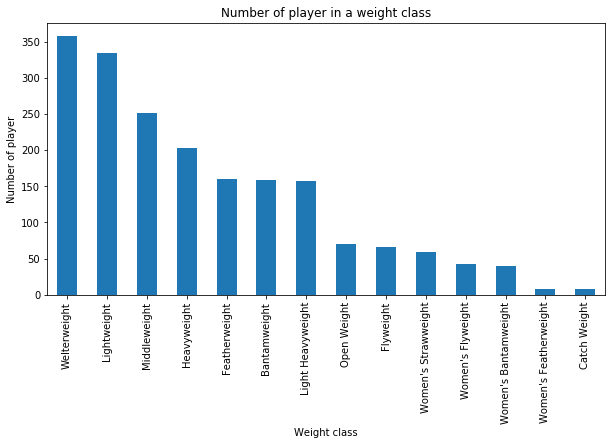

In [169]:
# No of player in a particular weight class
plt.figure(figsize=(10,5))
r_fighter=ufc[['R_fighter','weight_class']]
r_fighter=r_fighter.rename(columns={'R_fighter':'Fighter'})
b_fighter=ufc[['B_fighter','weight_class']]
b_fighter=b_fighter.rename(columns={'B_fighter':'Fighter'})
master_fighter=r_fighter.append(b_fighter,sort=False,ignore_index=True)
master_fighter.drop_duplicates(subset='Fighter', keep='first', inplace=True)
master_fighter.groupby('weight_class')['Fighter'].count().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Weight class')
plt.ylabel('Number of player')
plt.title('Number of player in a weight class')
plt.show()

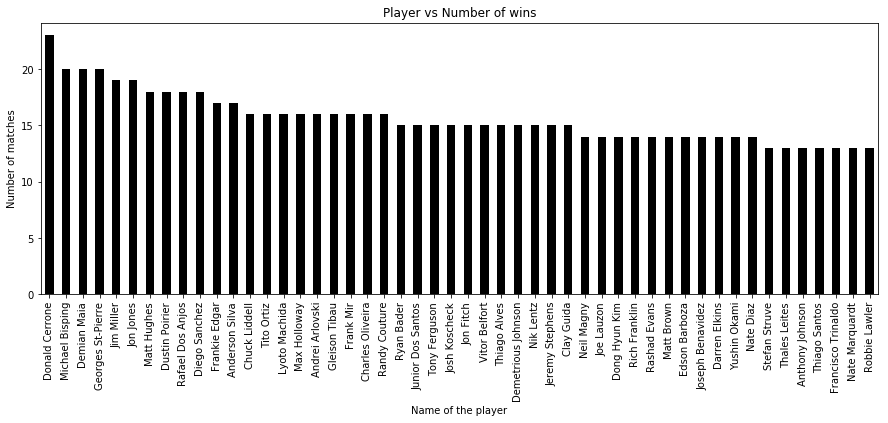

In [168]:
## top 50 players with most number of wins
ls=[]
for i in range(ufc.shape[0]):
    if (ufc.iloc[i].Winner=='Red'):
        ls.append(ufc.iloc[i].R_fighter)
    else:
        ls.append(ufc.iloc[i].B_fighter)
ufc['Winner_player']=ls
ufc['Winner_player'].value_counts().head(50).plot(kind='bar',color='black')
plt.xlabel('Name of the player')
plt.ylabel('Number of matches')
plt.title('Player vs Number of wins')
plt.show()

In [160]:
ufc['Winner'][0]

'Red'

## Prediction & Modelling

In [103]:
# dropping the columns
ufc.dropna(inplace=True)

In [104]:
# converting into fraction
ufc['B_avg_BODY']=(ufc['B_avg_BODY_landed']/ufc['B_avg_BODY_att'])
ufc['B_avg_CLINCH']=(ufc['B_avg_CLINCH_landed']/ufc['B_avg_CLINCH_att'])
ufc['B_avg_DISTANCE']=(ufc['B_avg_DISTANCE_landed']/ufc['B_avg_DISTANCE_att'])
ufc['B_avg_GROUND']=(ufc['B_avg_GROUND_landed']/ufc['B_avg_GROUND_att'])
ufc['B_avg_HEAD']=(ufc['B_avg_HEAD_landed']/ufc['B_avg_HEAD_att'])
ufc['B_avg_LEG']=(ufc['B_avg_LEG_landed']/ufc['B_avg_LEG_att'])
ufc['B_avg_SIG']=(ufc['B_avg_SIG_STR_landed']/ufc['B_avg_SIG_STR_att'])
ufc['R_avg_BODY']=(ufc['R_avg_BODY_landed']/ufc['R_avg_BODY_att'])
ufc['R_avg_CLINCH']=(ufc['R_avg_CLINCH_landed']/ufc['R_avg_CLINCH_att'])
ufc['R_avg_DISTANCE']=(ufc['R_avg_DISTANCE_landed']/ufc['R_avg_DISTANCE_att'])
ufc['R_avg_GROUND']=(ufc['R_avg_GROUND_landed']/ufc['R_avg_GROUND_att'])
ufc['R_avg_HEAD']=(ufc['R_avg_HEAD_landed']/ufc['R_avg_HEAD_att'])
ufc['R_avg_LEG']=(ufc['R_avg_LEG_landed']/ufc['R_avg_LEG_att'])
ufc['R_avg_SIG']=(ufc['R_avg_SIG_STR_landed']/ufc['R_avg_SIG_STR_att'])
ufc['B_avg_TOTAL_STR']=(ufc['B_avg_TOTAL_STR_landed']/ufc['B_avg_TOTAL_STR_att'])
ufc['R_avg_TOTAL_STR']=(ufc['R_avg_TOTAL_STR_landed']/ufc['R_avg_TOTAL_STR_att'])


In [105]:
# filling 0/0 with 0
ufc.fillna(0,inplace=True)

In [106]:
## dropping columns
ufc.drop(['B_avg_BODY_att','B_avg_BODY_landed','B_avg_CLINCH_att','B_avg_CLINCH_landed','B_avg_DISTANCE_att','B_avg_DISTANCE_landed','B_avg_GROUND_att','B_avg_GROUND_landed','B_avg_HEAD_att','B_avg_HEAD_landed','B_avg_LEG_att','B_avg_LEG_landed','B_avg_SIG_STR_att','B_avg_SIG_STR_landed','B_avg_TD_att','B_avg_TD_landed','B_avg_TOTAL_STR_att','B_avg_TOTAL_STR_landed','R_avg_BODY_att','R_avg_BODY_landed','R_avg_CLINCH_att','R_avg_CLINCH_landed','R_avg_DISTANCE_att','R_avg_DISTANCE_landed','R_avg_GROUND_att','R_avg_GROUND_landed','R_avg_HEAD_att','R_avg_HEAD_landed','R_avg_LEG_att','R_avg_LEG_landed','R_avg_SIG_STR_att','R_avg_SIG_STR_landed','R_avg_TD_att','R_avg_TD_landed','R_avg_TOTAL_STR_att','R_avg_TOTAL_STR_landed','date','Referee','location','R_Stance','B_Stance','B_avg_opp_BODY_att','B_avg_opp_BODY_landed','B_avg_opp_CLINCH_att','B_avg_opp_CLINCH_landed','B_avg_opp_DISTANCE_att','B_avg_opp_DISTANCE_landed','B_avg_opp_GROUND_att','B_avg_opp_GROUND_landed','B_avg_opp_HEAD_att','B_avg_opp_HEAD_landed','B_avg_opp_LEG_att','B_avg_opp_LEG_landed','B_avg_opp_SIG_STR_att','B_avg_opp_SIG_STR_landed','B_avg_opp_TD_att','B_avg_opp_TD_landed','B_avg_opp_TOTAL_STR_att','B_avg_opp_TOTAL_STR_landed','R_avg_opp_BODY_att','R_avg_opp_BODY_landed','R_avg_opp_CLINCH_att','R_avg_opp_CLINCH_landed','R_avg_opp_DISTANCE_att','R_avg_opp_DISTANCE_landed','R_avg_opp_GROUND_att','R_avg_opp_GROUND_landed','R_avg_HEAD_att','R_avg_opp_HEAD_landed','R_avg_opp_LEG_att','R_avg_opp_LEG_landed','R_avg_opp_SIG_STR_att','R_avg_SIG_STR_landed','R_avg_opp_TD_att','R_avg_opp_TD_landed','R_avg_opp_TOTAL_STR_att','R_avg_opp_TOTAL_STR_landed','Winner_player'],axis=1,inplace=True)

In [107]:
#labelling the categorical column
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()
ufc['R_fighter']=x1.fit_transform(ufc['R_fighter'])
ufc['B_fighter']=x1.fit_transform(ufc['B_fighter'])
ufc['title_bout']=x1.fit_transform(ufc['title_bout'])
ufc['weight_class']=x1.fit_transform(ufc['weight_class'])


In [110]:
# dropping country
ufc.drop(['Country'],axis=1,inplace=True)

In [111]:
y=ufc['Winner']
x=ufc.drop(['Winner'],axis=1)

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [121]:
#logistic
lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [122]:
accuracy_score(y_test,prediction)

0.6579275905118602

In [124]:
# Gradient
gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
y_pred3=gb.predict(x_test)
accuracy_score(y_test,y_pred3)

0.6379525593008739

In [125]:
# DecisionTree
clfl=DecisionTreeClassifier()
clfl.fit(x_train,y_train)
Y_pred=clfl.predict(x_test)
print('accuracy=',accuracy_score(y_test,Y_pred))

accuracy= 0.5393258426966292


In [126]:
# AdaBoost
ab=AdaBoostClassifier(n_estimators=100)
ab.fit(x_train,y_train)
y_pred1=ab.predict(x_test)
accuracy_score(y_test,y_pred1)

0.6067415730337079

In [127]:
# XGboost
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.6529338327091136